In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats import norm, skew

In [4]:
#read data into dataframes
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [6]:
#number of samples & number of features
print(f"Initial test data size is: {test_df.shape}")
print(f"Initial train data size is: {train_df.shape}")

Initial test data size is: (1459, 80)
Initial train data size is: (1460, 81)


In [8]:
#drop ID columns since it does not tell anything
train_df.drop('Id', axis=1, inplace=True)
test_df.drop('Id', axis=1, inplace=True)
print(f"Dropping ID feature, test data size is: {test_df.shape}")
print(f"Dropping ID feature, train data size is: {train_df.shape}")

KeyError: "['Id'] not found in axis"

In [10]:
#check column types
train_df_column_types=train_df.dtypes.value_counts()
type_dct={str(k):list(v) for k,v in train_df.groupby(train_df.dtypes,axis=1)}
print()
print(f'Count of column data types: \n{train_df_column_types}\n')
print(f'Classification of feature by data type:\n{type_dct}\n')
print()


Count of column data types: 
object     43
int64      34
float64     3
dtype: int64

Classification of feature by data type:
{'int64': ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], 'float64': ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], 'object': ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinT

In [12]:
# list of variables that contain year information
numeric_features=train_df.select_dtypes(include=[np.number])
datetime_features=[x for x in numeric_features if 'Year' in x or 'Yr' in x]
print(f'Year features include:\n{datetime_features}\n')
print('81 total features; 32 numerical, 43 categorical, plus 4 Year features, Id & SalePrice.\n')

Year features include:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

81 total features; 32 numerical, 43 categorical, plus 4 Year features, Id & SalePrice.



In [13]:

#univariate visualisation
print('Univariate analysis of target variable: SalePrice')
train_df['SalePrice'].describe()
sns.distplot(train_df['SalePrice'],fit=norm)
plt.show()
print('SalePrice distribution deviates from a Gaussian distribution and has a positive skew.')

Univariate analysis of target variable: SalePrice


NameError: name 'norm' is not defined

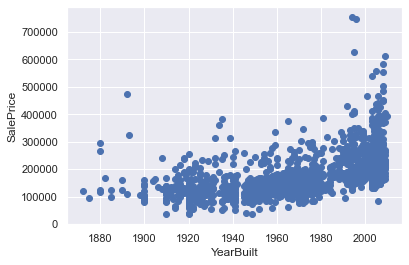

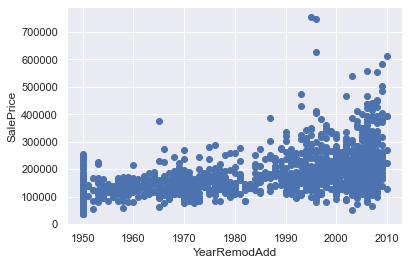

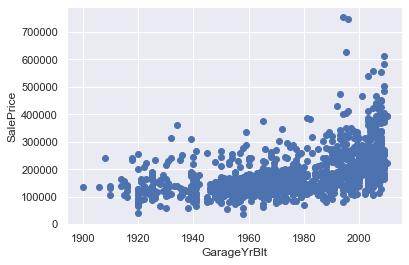

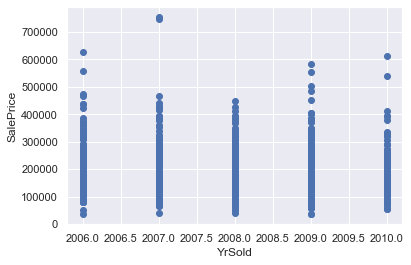

In [14]:

#compare Year features with SalePrice
for x in datetime_features:
    train_df_copy=train_df.copy()
    plt.scatter(train_df_copy[x],train_df_copy['SalePrice'])
    plt.xlabel(x)
    plt.ylabel('SalePrice')
    plt.show()
